In [7]:
#  **************************************** THE DATA *******************************************
import pandas as pd
from collections import Counter
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Criamos uma variavel equivalente do tipo DataFrame equivalente ao arquivo csv
crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
crimes.head()



,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,M,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,P,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,D,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,D,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN


In [9]:
#  ******************************** Analyzing the times of crimes *******************************************
#Coluna com data e hora
d_time = pd.to_datetime(crimes["Dispatch Date / Time"])
#Coluna com o nome do dia da semana
d_week = d_time.dt.weekday_name
#Coluna com os meses contados em inteiros de 1 a 12
df_month = d_time.dt.month
#Coluna com as horas:minutos:segundos
df_time = d_time.dt.time

#Moda do mes, dia da semana e horario
df_month.mode() #10
d_week.mode() #Tuesday
df_time.mode() #07:38:24 & 09:40:11 

#Definir a coluna de manha, tarde e noite. NAO esquecer de inicializar a lista, pois pega lixo
lista_time_of_day = []
for index, item in enumerate(df_time):
    if item.strftime('%H:%M:%S') >= '00:00:00' and item.strftime('%H:%M:%S') <= '11:59:59':
        lista_time_of_day.append("Morning")
    elif item.strftime('%H:%M:%S') >= '12:00:00' and item.strftime('%H:%M:%S') <= '17:59:59':
        lista_time_of_day.append("Afternoon")
    elif item.strftime('%H:%M:%S') >= '18:00:00' and item.strftime('%H:%M:%S') <= '23:59:59':
        lista_time_of_day.append("Night")

#Mudamos o tipo da variavel lista_time_of_day, para ser possivel utilizar a funcao mode()
pd.core.series.Series(lista_time_of_day).mode()        
        
#Seleciona a coluna Police District Name
pdn = crimes["Police District Name"]
#Retorna os valores true or false
#empty = true
#not empty = false
missing_values_pdn = pd.isnull(pdn)
#Retorna os dados de pdn que sao empty values para a variavel pdn_is_null
pdn_is_null = pdn[missing_values_pdn]
#Tamanho da lista pdn_is_null
len(pdn_is_null)

column = [
    "Police District Name",
    "Block Address",
    "Zip Code",
    "Sector",
    "Beat",
    "Latitude",
    "Longitude",
    "Police District Number",
    "Location",
    "Address Number",
    "Start Date / Time",
    "End Date / Time"
]

variables = [
    "Police_District_Name",
    "Block_Address",
    "Zip_Code",
    "Sector",
    "Beat",
    "Latitude",
    "Longitude",
    "Police_District_Number",
    "Location",
    "Address_Number",
    "StartDateTime",
    "EndDateTime"
]

#O array column permite permutar os nomes das colunas
#O array var, serve apenas para formatação na impressao dos dados
for (var, col) in zip(variables, column):
    comprimento = len(crimes[pd.isnull(crimes[col])])
    print (var ," -> Comprimento: ", comprimento)


Police_District_Name  -> Comprimento:  0
Block_Address  -> Comprimento:  0
Zip_Code  -> Comprimento:  30
Sector  -> Comprimento:  46
Beat  -> Comprimento:  8
Latitude  -> Comprimento:  161
Longitude  -> Comprimento:  161
Police_District_Number  -> Comprimento:  0
Location  -> Comprimento:  161
Address_Number  -> Comprimento:  132
StartDateTime  -> Comprimento:  0
EndDateTime  -> Comprimento:  10178


In [10]:
#  ******************************** Analyzing locations of crimes ******************************************

#Obtem os dados da tabela crimes onde na coluna 'Police District Name' corresponde a "BETHESDA"
tabela_beth = crimes[crimes['Police District Name'].str.contains("BETHESDA") ]
#Obtem o Zip Code com maior repeticao na tabela_beth 
max_beth = tabela_beth['Zip Code'].mode()
print("BETHESDA")
#Indica todos os Zip Code sem repticao, com suas respectivas quantidades de repeticao
counter_bethesda = Counter(tabela_beth['Zip Code'])
print(Counter(tabela_beth['Zip Code']))

tabela_other = crimes[crimes['Police District Name'].str.contains("OTHER")]
cep_other = tabela_other['Zip Code']
max_other = tabela_other['Zip Code'].mode()
print("OTHER")
counter_other = Counter(tabela_other['Zip Code'])
print(Counter(tabela_other['Zip Code']))

tabela_german = crimes[crimes['Police District Name'].str.contains("GERMANTOWN")]
max_german = tabela_german['Zip Code'].mode()
print("GERMANTOWN")
print(Counter(tabela_german['Zip Code']))

tabela_mont = crimes[crimes['Police District Name'].str.contains("MONTGOMERY VILLAGE")]
max_mont = tabela_mont['Zip Code'].mode()
print("MONTGOMERY VILLAGE")
print(Counter(tabela_mont['Zip Code']))

tabela_rock = crimes[crimes['Police District Name'].str.contains("ROCKVILLE")]
max_rock = tabela_rock['Zip Code'].mode()
print("ROCKVILLE")
print(Counter(tabela_rock['Zip Code']))

tabela_silver = crimes[crimes['Police District Name'].str.contains("SILVER SPRING")]
max_silver = tabela_silver['Zip Code'].mode()
print("SILVER SPRING")
print(Counter(tabela_silver['Zip Code']))

tabela_wheaton = crimes[crimes['Police District Name'].str.contains("WHEATON")]
max_wheaton = tabela_wheaton['Zip Code'].mode()
print("WHEATON")
print(Counter(tabela_wheaton['Zip Code']))

tabela_takoma = crimes[crimes['Police District Name'].str.contains("TAKOMA PARK")]
max_takoma = tabela_takoma['Zip Code'].mode()
print("TAKOMA PARK")
print(Counter(tabela_takoma['Zip Code']))

BETHESDA
Counter({20814.0: 914, 20817.0: 579, 20852.0: 533, 20815.0: 496, 20895.0: 275, 20816.0: 207, 20854.0: 161, 20910.0: 151, 20892.0: 23, 20818.0: 18, 20894.0: 15, 20902.0: 6, 20812.0: 4, nan: 1})
OTHER
Counter({20872.0: 1, 20815.0: 1, nan: 1, 20723.0: 1, 20782.0: 1, 20878.0: 1, 20832.0: 1, 20874.0: 1})
GERMANTOWN
Counter({20874.0: 1382, 20876.0: 744, 20872.0: 229, 20871.0: 173, 20882.0: 108, 20841.0: 86, 20879.0: 11, 20842.0: 7, 20838.0: 4, 21771.0: 3, 20833.0: 2, 20855.0: 2, 20837.0: 1, 20886.0: 1, nan: 1, nan: 1})
MONTGOMERY VILLAGE
Counter({20877.0: 1422, 20878.0: 863, 20886.0: 682, 20879.0: 552, 20855.0: 114, 20850.0: 108, 20882.0: 34, 20899.0: 19, 20832.0: 4, 20876.0: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 20874.0: 1, nan: 1, nan: 1})
ROCKVILLE
Counter({20850.0: 1266, 20852.0: 678, 20851.0: 428, 20878.0: 373, 20854.0: 367, 20855.0: 154, 20837.0: 104, 20874.0: 37, 20877.0: 26, 20842.0: 19, 20853.0: 19, 20841.0: 4, 20839.0: 2, 20906.0: 1, na

In [11]:

# Cidade de BETHESDA

#Acha o zip code com maior número de ocorrencias em BETHESDA
max_beth = tabela_beth['Zip Code'].mode()
#Obtem os dados da tabela crimes onde na coluna 'Police District Name' corresponde a "BETHESDA"
tabela_beth = crimes[crimes['Police District Name'].str.contains("BETHESDA")]
#Obtem os zip code da cidade de BETHESDA
tabela_beth_zip = tabela_beth['Zip Code']

#Converte max_beth para list
list_beth=list(max_beth)
#Inicia o contador de ocorrências de BETHESDA
cont_beth = 0
#Percorre o vetor de Zip Code de BETHESDA para realizar a contagem de ocorrencias do Zip Code de maior 
#Ocorrencia
for ind,value in enumerate(tabela_beth_zip):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(list_beth[0]) == nova_lista:
        cont_beth = cont_beth + 1

#Armazena em uma lista nome do distrito, CEP de maior ocorrencia e quantidade de vezes que ele ocorre
linha01 = []        
linha01.append("BETHESDA")
linha01.append(list_beth)
linha01.append(cont_beth)

#print('list_BETHESDA:', list_beth)
#print('cont_BETHESDA: ', cont_beth)

# Outras Cidades
max_other = tabela_other['Zip Code'].mode()

tabela_other = crimes[crimes['Police District Name'].str.contains("OTHER")]
tabela_other_zip = tabela_other['Zip Code']

list_other=list(max_other)
cont_other = 0
for ind,value in enumerate(tabela_other_zip):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(list_other[0]) == nova_lista:
        cont_other = cont_other + 1


linha02 = []        
linha02.append("OTHER")
linha02.append(list_other)
linha02.append(cont_other)
        
#print('list_OTHER:', list_other)
#print('cont_OTHER: ', cont_other)

# Cidade de GERMANTOWN
max_german = tabela_german['Zip Code'].mode()

tabela_german = crimes[crimes['Police District Name'].str.contains("GERMANTOWN")]
tabela_german_zip = tabela_german['Zip Code']

list_german=list(max_german)
cont_german = 0
for ind,value in enumerate(tabela_german_zip):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(list_german[0]) == nova_lista:
        cont_german = cont_german + 1

linha03 = []        
linha03.append("GERMANTOWN")
linha03.append(list_german)
linha03.append(cont_german)
        
#print('list_GERMANTOWN:', list_german)
#print('cont_GERMANTOWN: ', cont_german)

# Cidade de MONTGOMERY VILLAGE
max_mont = tabela_mont['Zip Code'].mode()

tabela_mont = crimes[crimes['Police District Name'].str.contains("MONTGOMERY VILLAGE")]
tabela_mont_zip = tabela_mont['Zip Code']

list_mont=list(max_mont)
cont_mont = 0
for ind,value in enumerate(tabela_mont_zip):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(list_mont[0]) == nova_lista:
        cont_mont = cont_mont + 1
        
linha04 = []        
linha04.append("MONTGOMERY VILLAGE")
linha04.append(list_mont)
linha04.append(cont_mont)

#print('list_MONTGOMERY VILLAGE:', list_mont)
#print('cont_MONTGOMERY VILLAGE: ', cont_mont)

# Cidade de ROCKVILLE
max_rock = tabela_rock['Zip Code'].mode()

tabela_rock = crimes[crimes['Police District Name'].str.contains("ROCKVILLE")]
tabela_rock_zip = tabela_rock['Zip Code']

list_rock = list(max_rock)
cont_rock = 0
for ind,value in enumerate(tabela_rock_zip):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(list_rock[0]) == nova_lista:
        cont_rock = cont_rock + 1

        
        
linha05 = []        
linha05.append("ROCKVILLE")
linha05.append(list_rock)
linha05.append(cont_rock)
        
#print('list_ROCKVILLE:', list_rock)
#print('cont_ROCKVILLE: ', cont_rock)


# Cidade de SILVER SPRING
max_silver = tabela_silver['Zip Code'].mode()

tabela_silver = crimes[crimes['Police District Name'].str.contains("SILVER SPRING")]
tabela_silver_zip = tabela_silver['Zip Code']

list_silver = list(max_silver)
cont_silver = 0
for ind,value in enumerate(tabela_silver_zip):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(list_silver[0]) == nova_lista:
        cont_silver = cont_silver + 1
        
        
linha06 = []        
linha06.append("SILVER SPRING")
linha06.append(list_silver)
linha06.append(cont_silver)

#print('list_SILVER SPRING:', list_silver)
#print('cont_SILVER SPRING: ', cont_silver)


# Cidade de Wheaton
max_wheaton = tabela_wheaton['Zip Code'].mode()

tabela_wheaton = crimes[crimes['Police District Name'].str.contains("WHEATON")]
tabela_wheaton_zip = tabela_wheaton['Zip Code']

list_wheaton=list(max_wheaton)
cont_wheaton = 0
for ind,value in enumerate(tabela_wheaton_zip):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(list_wheaton[0]) == nova_lista:
        cont_wheaton = cont_wheaton + 1

        
linha07 = []        
linha07.append("WHEATON")
linha07.append(list_wheaton)
linha07.append(cont_wheaton)
        
#print('list_wheaton:', list_wheaton)
#print('cont_wheaton: ', cont_wheaton)

# Cidade de TAKOMA PARK
max_takoma = tabela_takoma['Zip Code'].mode()

tabela_takoma = crimes[crimes['Police District Name'].str.contains("TAKOMA PARK")]
tabela_takoma_zip = tabela_takoma['Zip Code']

list_takoma=list(max_takoma)
cont_takoma = 0
for ind,value in enumerate(tabela_takoma_zip):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(list_takoma[0]) == nova_lista:
        cont_takoma = cont_takoma + 1

linha08 = []        
linha08.append("TAKOMA PARK")
linha08.append(list_takoma)
linha08.append(cont_takoma)


#Armazena todas as areas mais perigosas 
areas_perigosas = [linha01,linha02,linha03,linha04,linha05,linha06,linha07,linha08]

#Armazena na variável a máxima quantidade de ocorrencia entre as selecionadas anteriormente 
max_area_repeticao = max([x[2] for x in areas_perigosas])

# Imprime na tela o nome da cidade, CEP e quantidade de ocorrewncias da área mais violenta
for linha in areas_perigosas:
    for coluna in linha:
        if max_area_repeticao == coluna:
            cidade_area_perigosa=linha
            print(cidade_area_perigosa)
        


['SILVER SPRING', [20910.0], 1865]


In [13]:
#Extração dos dados para list para facilitar o manuseamento dos mesmos
y = Counter(pdn)
m=[]
[m.extend([k,v]) for k,v in y.items()]
value_crimes = []
keys_crimes = []
for ind in range(len(m)):
    if ind % 2 == 0:
        keys_crimes.append(m[ind])
    else:
        value_crimes.append(m[ind])
#Lista para guardar os valores da taxa de crimes per capta
per_capta = []
#População tirado dos dados mostrados pelo anuário do distritos policiais
population = (1,131391,147486,182883,149118,151991,208263,1)
#Cálculo dos crimes per capta
#Apesar de Outros e Takoma Park estarem na lista, eles não foram utilizados nesse cálculo, pois os mesmos possuem números que 
#fazem muita diferença.
for ind in range(len(keys_crimes)):
    #Desconsiderando Outros e Takoma Park
    if keys_crimes[ind] == 'OTHER' or keys_crimes[ind] == 'TAKOMA PARK':
        per_capta.append(population[ind])
    #O resultado é multiplicado por 100000, que mostra a quantidade de de crimes a cada 100000 habitantes.    
    else:
        per_capta.append(value_crimes[ind]/population[ind]*100000)
print ("The area that has the highest number of crimes per capta is: ",keys_crimes[per_capta.index(max(per_capta))]," with crime rate per capta: ","%.1f" % max(per_capta),"/100,000")

The area that has the highest number of crimes per capta is:  SILVER SPRING  with crime rate per capta:  3640.3 /100,000


In [14]:
#  ******************************** Analyzing types of crime ******************************************
descricao = crimes["Class Description"]

valor = Counter(descricao)
valorKeys=valor.keys();

crime_menos_comum = []
x = valor.values()
minimo_x = min(x)
maximo_x = max(x)
#Separando os valores e chaves para facilitar o manuseio 
l=[]
[l.extend([k,v]) for k,v in valor.items()]
valores = []
chaves = []
for ind in range(len(l)):
    if ind % 2 == 0:
        chaves.append(l[ind])
    else:
        valores.append(l[ind])
#Criando um novo vetor de valores para ordená-lo e posteriormente calcular a mediana, definindo um limiar entre crimes mais comuns
#e os crimes menos comuns
valor_ord = []
for ind in range(len(valores)):
    valor_ord.append(valores[ind])
valor_ord.sort()       
mediana = stat.median(valor_ord)
#Separação de chaves e valores para facilitar o manuseio dos dados, a mediana é definida como limiar entre os mais comuns e os
#menos comuns
crime_mais_comum = []
crime_menos_comum = []
valores_crime_menos_comum = []
valores_crime_mais_comum = []
#Separação entre mais comuns e menos comuns, usando a mediana como limiar. 
for ind in range(len(chaves)):
    if valores[ind] <= mediana:
        crime_menos_comum.append(chaves[ind])
        valores_crime_menos_comum.append(valores[ind])
    else:
        crime_mais_comum.append(chaves[ind])
        valores_crime_mais_comum.append(valores[ind])
#Realizando o calculo para obter os crimes menos comuns
crime_least = []
menor = min(valores_crime_menos_comum)
for ind in range(len(crime_menos_comum)):
    if valores_crime_menos_comum[ind] == menor:
        crime_least.append(crime_menos_comum[ind])
#Realizando o calculo para obter os crimes mais comuns
crime_most = []
maior = max(valores_crime_mais_comum)
for ind in range(len(crime_mais_comum)):
    if valores_crime_mais_comum[ind] == maior:
        crime_most.append(crime_mais_comum[ind])
#Mostrando os crimes menos comuns e suas quantidades de ocorrências
print ("Os crimes menos comuns foram: ")
for ind in range(len(crime_least)):
       print(crime_least[ind], "com ", menor, " ocorrência.")
#Mostrando o crime mais comum e sua quantidade de ocorrências
print ("O crime mais comum foi: ",crime_most, "com ", maior, " ocorrências.")
#Mostrando os crimes mais comuns e os menos comuns em um dataFrame     
#print (pd.DataFrame(valores_crime_menos_comum,crime_menos_comum))
#print (pd.DataFrame(valores_crime_mais_comum,crime_mais_comum))

#Crimes violentos e nao violentos
violents = []
n_violents = []
violents_values = []
n_violents_values = []
#Como crimes violentos, foi considerado que qualquer crime que tivesse o nome ASSAULT ou ASSLT ou SEX foram considerados
#violentos, o restante foi considerado não violento. Sempre os valores e os nomes de cada crime são guardados para posterior uso
for ind in range(len(chaves)):
    temp_string = chaves[ind]
    new_string = temp_string.split()
#Se qualquer uma dessas palavras existir dentro da string de cada crime, ela é adicionada a lista de crimes violentos
    for i in range(len(new_string)):
        if 'ASSAULT' == new_string[i] or 'ASSLT' == new_string[i] or 'SEX' == new_string[i]:
            violents.append(temp_string)
            violents_values.append(valores[ind])
            break
#Se nenhuma das palavras acima estiverem em toda as string de cada crime, ela é adicionada a lista de crimes não violentos
        elif i == len(new_string) - 1:
            n_violents.append(temp_string)
            n_violents_values.append(valores[ind])
#print (pd.DataFrame(violents_values,pd.DataFrame(violents)))
#Mostrando os crimes que mais ocorrem (Violentos e não violentos)
print ("O crime mais violento que mais ocorre é: ",violents[violents_values.index(max(violents_values))])
print ("O crime não violento que mais ocorre é: ",n_violents[n_violents_values.index(max(n_violents_values))])



Os crimes menos comuns foram: 
LARCENY COIN MACH $50-$199 com  1  ocorrência.
CDS-POSS INHALANT/GLUE/AEROSOL com  1  ocorrência.
EMBEZZLE UNDER $300 com  1  ocorrência.
ANIMAL OFFENSE - HOT CAR com  1  ocorrência.
BURG FORCE-SCH/TIME UNK com  1  ocorrência.
PARKING OFFENSES com  1  ocorrência.
ROB OTHER WEAPON GAS/SVC  STA com  1  ocorrência.
CDS IMPLMNT-BARBITUR/AMPHETAMI com  1  ocorrência.
LARCENY COIN MACH OVER $200 com  1  ocorrência.
CDS-MANU DRUG OVERDOSE NOT FATAL com  1  ocorrência.
BURG FORCE - ATTEMPT - SCH/NIGHT com  1  ocorrência.
ANIMAL NUISANCE/BARKING com  1  ocorrência.
CDS-USE SYNTH DEMEROL/METADONE com  1  ocorrência.
SUDDEN DEATH DROWNING com  1  ocorrência.
AGG ASSLT BEAT/INJ ELDERLY com  1  ocorrência.
TRAFFIC HAZARD com  1  ocorrência.
ABANDONED AUTO com  1  ocorrência.
VANDALISM GRAFFITI CHURCH/TEMP com  1  ocorrência.
VANDALISM POSSESSION GRAFFITI MATERIAL com  1  ocorrência.
HOMICIDE-OTHER com  1  ocorrência.
SUICIDE-ATTEMPT-FIREARM com  1  ocorrência.
BURG NO

In [15]:
#  ******************************** Combine Analysis ******************************************
more_violent = violents[violents_values.index(max(violents_values))]
more_no_violent = n_violents[n_violents_values.index(max(n_violents_values))]
#Iniciando a separação dos crimes mais violentos que mais ocorreram e dos não violentos que menos ocorreram
city = []
data = []
city_n = []
data_n = []
#Criando um novo dataframe apenas com os dados importantes, como a Cidade que ocorreu o crime e a data
Citys = crimes[["City","Dispatch Date / Time"]]
Description = crimes["Class Description"]
for index, item in enumerate(Description):
    if more_violent == item:
        city.append(Citys.get_value(index,0,1))
        data.append(Citys.get_value(index,1,1))
    elif more_no_violent == item:
        city_n.append(Citys.get_value(index,0,1))
        data_n.append(Citys.get_value(index,1,1))
#Mostrando a cidade em que ocorreu o crime mais violento e o não violento
print ("The city with most violent crime is: ",stat.mode(city))
print ("The city with most no violent crime is: ",stat.mode(city_n))

#Separação das datas para mostrar em qual data ocorreu mais crimes violentos e não violentos
new_date = []
new_date_n = []
#O dataframe gera a data completa, queremos apenas a parte da data em que mostra dia, mês e ano
#Os laços a seguir fazem essa filtragem: quebra a string em vários pedaços e pega apenas a primeira parte, que é exatamente
#o que queremos
for ind in range(len(data)):
    temp_string = data[ind]
    temp_string = temp_string.split()
    for i in range(len(temp_string)):
        if i == 0:
            new_date.append(temp_string[i])
            break
for ind in range(len(data_n)):
    temp_string = data_n[ind]
    temp_string = temp_string.split()
    for i in range(len(temp_string)):
        if i == 0:
            new_date_n.append(temp_string[i])
            break
#Mostra a data em que mais ocorreu crimes violentos e não violentos junto de suas quantidades de ocorrências
date_mode = Counter(new_date)
date_mode_n = Counter(new_date_n)
print ("A data que mais ocorreu crimes violentos foi: ",date_mode.most_common(1))
print ("A data que mais ocorreu crimes não violentos foi: ",date_mode_n.most_common(1))

The city with most violent crime is:  SILVER SPRING
The city with most no violent crime is:  SILVER SPRING
A data que mais ocorreu crimes violentos foi:  [('09/03/2013', 8)]
A data que mais ocorreu crimes não violentos foi:  [('10/26/2013', 30)]


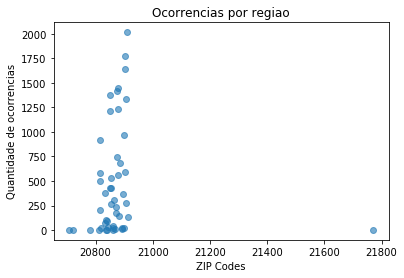

1341
4899
20910


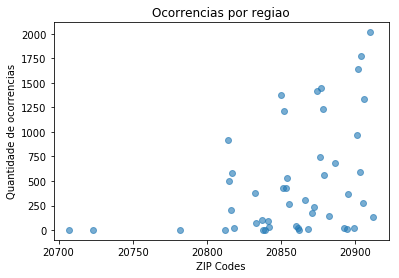

In [28]:
#  ****************************** Posing and answering your own questions ****************************************

# Identifique gráficamente as areas onde os crimes mais ocorrem

#Selecionando os crimes por area atraves do Zip Code
#Retorna true quando nao eh not a number
zipcode = crimes[~pd.isnull(crimes['Zip Code'])]
#Imprime todo o conteudo da tabela que tenha o index retornado true
zipc = zipcode['Zip Code']

#Define todos zip codes com suas respectivas repeticoes
zp=Counter(zipc)
#Quantidade de repeticoes dos Zip Codes
yy = zp.values()
#Os Zip Codes
xx = zp.keys()

#Plot para o grafico de dispercao
plt.scatter(x = [float(b) for b in xx],
            y = [float(a) for a in yy],
            alpha = 0.6
           )
plt.title("Ocorrencias por regiao")
plt.xlabel("ZIP Codes")
plt.ylabel("Quantidade de ocorrencias")
plt.show()

#encrontando indices do outlier
for index, item in enumerate(zipc):
    if item == 21771:
        indice = index
        print (index)        
        
#1341
#4899
#20910

#Eliminando os outliers
zipc = zipc.drop(zipc.index[[1341, 4899, 20910]])
        
#Imprime novamente o grafico de dispescao sem os pontos outliers
zp=Counter(zipc)
yy = zp.values()
xx = zp.keys()        
plt.scatter(x = [float(v) for v in xx],
            y = [float(t) for t in yy],
            alpha = 0.6
           )

plt.title("Ocorrencias por regiao")
plt.xlabel("ZIP Codes")
plt.ylabel("Quantidade de ocorrencias")
plt.show()

In [29]:
#Top 5 das ocorrencias de crimes por cidade

# Conta quantas vezes cada caso ocorre e armazena em uma variável 
c_beth = Counter(tabela_beth["Class Description"])
# Imprime os 5 mais frequêntes 
print(c_beth.most_common(5))

c_other = Counter(tabela_other["Class Description"])
print(c_other.most_common(5))

c_german = Counter(tabela_german["Class Description"])
print(c_german.most_common(5))

c_mont = Counter(tabela_mont["Class Description"])
print(c_mont.most_common(5))

c_rock = Counter(tabela_rock["Class Description"])
print(c_rock.most_common(5))

c_silver = Counter(tabela_silver["Class Description"])
print(c_silver.most_common(5))

c_wheaton = Counter(tabela_wheaton["Class Description"])
print(c_wheaton.most_common(5))

c_takoma = Counter(tabela_takoma["Class Description"])
print(c_takoma.most_common(5))




[('DRIVING UNDER THE INFLUENCE', 263), ('LARCENY FROM BUILDING OVER $200', 215), ('LARCENY FROM AUTO OVER $200', 186), ('POL INFORMATION', 141), ('LOST PROPERTY', 139)]
[('BURG FORCE-RES/NIGHT', 1), ('FORGERY/CNTRFT-CHECKS', 1), ('LARCENY FROM AUTO $50 - $199', 1), ('CDS-SELL-MARIJUANA/HASHISH', 1), ('CDS-MANU-HALLUC/LSD/PCP/ETC', 1)]
[('DRIVING UNDER THE INFLUENCE', 252), ('CDS-POSS MARIJUANA/HASHISH', 246), ('POL INFORMATION', 139), ('VANDALISM-MOTOR VEHICLE', 92), ('MENTAL TRANSPORT', 92)]
[('DRIVING UNDER THE INFLUENCE', 295), ('CDS-POSS MARIJUANA/HASHISH', 267), ('MENTAL TRANSPORT', 189), ('POL INFORMATION', 181), ('VANDALISM-MOTOR VEHICLE', 137)]
[('POL INFORMATION', 270), ('DRIVING UNDER THE INFLUENCE', 243), ('LOST PROPERTY', 157), ('CDS-POSS MARIJUANA/HASHISH', 145), ('LARCENY FROM BUILDING OVER $200', 133)]
[('CDS-POSS MARIJUANA/HASHISH', 382), ('DRIVING UNDER THE INFLUENCE', 347), ('POL INFORMATION', 258), ('LARCENY FROM AUTO OVER $200', 257), ('LIQUOR - DRINK IN PUB OVER 21

C:\Users\yurip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


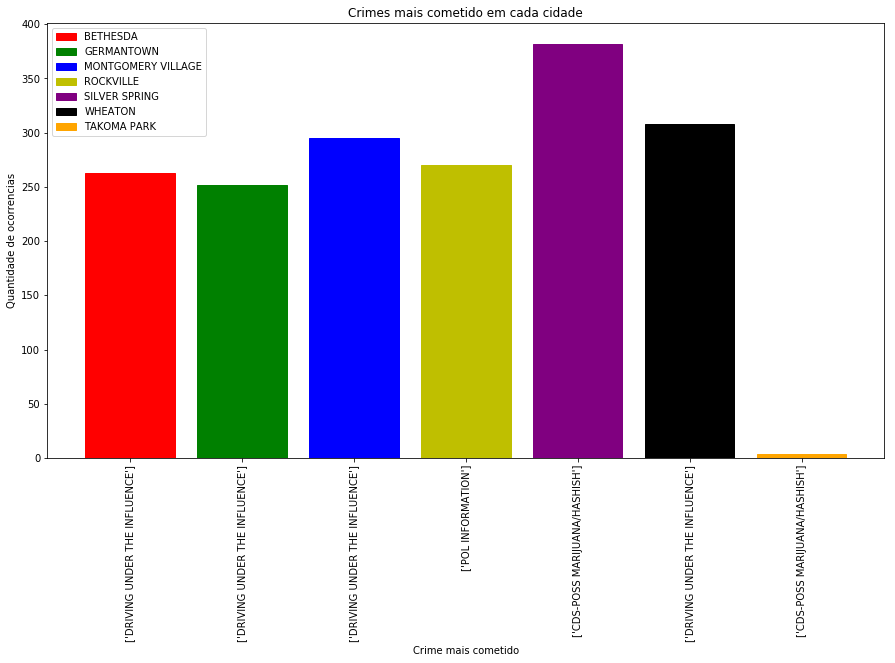

In [36]:
# Identifique gráficamente os crimes mais ocorrem em cada cidade

#Obtem os tipos de crimes da cidade de BETHESDA
tabBet_Desc = tabela_beth["Class Description"]
#Obtem o crime que mais ocorre na cidade
maxbeth = tabBet_Desc.mode()
#Armazena o crime que mais ocorre em uma lista
c_beth = list(maxbeth)
#Inicia o contador de ocorrencias do crime mais frenquente
cont_beth_desc = 0
#Percorre o vetor de tipos de crimes de BETHESDA para realizar a contagem de ocorrencias do tipo de crime
#de maior ocorrencia
for ind,value in enumerate(tabBet_Desc):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(c_beth[0]) == nova_lista:
        cont_beth_desc = cont_beth_desc + 1

        
tabgerman_Desc = tabela_german["Class Description"]
maxgerman = tabgerman_Desc.mode()
c_german = list(maxgerman)
cont_german_desc = 0
for ind,value in enumerate(tabgerman_Desc):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(c_german[0]) == nova_lista:
        cont_german_desc = cont_german_desc + 1
        
        
tabmont_Desc = tabela_mont["Class Description"]
maxmont = tabmont_Desc.mode()
c_mont = list(maxmont)
cont_mont_desc = 0
for ind,value in enumerate(tabmont_Desc):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(c_mont[0]) == nova_lista:
        cont_mont_desc = cont_mont_desc + 1
        
tabrock_Desc = tabela_rock["Class Description"]
maxrock = tabrock_Desc.mode()
c_rock = list(maxrock)
cont_rock_desc = 0
for ind,value in enumerate(tabrock_Desc):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(c_rock[0]) == nova_lista:
        cont_rock_desc = cont_rock_desc + 1
        
tabsilver_Desc = tabela_silver["Class Description"]
maxsilver = tabsilver_Desc.mode()
c_silver = list(maxsilver)
cont_silver_desc = 0
for ind,value in enumerate(tabsilver_Desc):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(c_silver[0]) == nova_lista:
        cont_silver_desc = cont_silver_desc + 1
        
tabwheaton_Desc = tabela_wheaton["Class Description"]
maxwheaton = tabwheaton_Desc.mode()
c_wheaton = list(maxwheaton)
cont_wheaton_desc = 0
for ind,value in enumerate(tabwheaton_Desc):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(c_wheaton[0]) == nova_lista:
        cont_wheaton_desc = cont_wheaton_desc + 1
        
        
tabtakoma_Desc = tabela_takoma["Class Description"]
maxtakoma = tabtakoma_Desc.mode()
c_takoma = list(maxtakoma)
cont_takoma_desc = 0
for ind,value in enumerate(tabtakoma_Desc):
    nova_lista = value
    nova_lista = str(nova_lista)
    if str(c_takoma[0]) == nova_lista:
        cont_takoma_desc = cont_takoma_desc + 1
        
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)
        
#Define o label de cada coluna
LABELS =[c_beth,c_german,c_mont,c_rock,c_silver,c_wheaton,c_takoma]
#Define o eixe Y
eixo_y =[cont_beth_desc,cont_german_desc,cont_mont_desc,cont_rock_desc,cont_silver_desc,cont_wheaton_desc,cont_takoma_desc]
#Define o eixo X
eixo_X = [1,2,3,4,5,6,7]
#Define o título do gráfico
plt.title("Crimes mais cometido em cada cidade")
#Define o label do eixo Y
plt.ylabel('Quantidade de ocorrencias')
#Define o label do eixo X
plt.xlabel('Crime mais cometido')
#Plota o gráfico
barra = plt.bar(eixo_X, eixo_y, align='center')

#Define a cor de cada barra
barra[0].set_color('red')
barra[1].set_color('green')
barra[2].set_color('blue')
barra[3].set_color('y')
barra[4].set_color('purple')
barra[5].set_color('black')
barra[6].set_color('orange')

#Define a legenda de cada barra
red_patch = mpatches.Patch(color='red', label='BETHESDA')

green_patch = mpatches.Patch(color='green', label='GERMANTOWN')

blue_patch = mpatches.Patch(color='blue', label='MONTGOMERY VILLAGE')

y_patch = mpatches.Patch(color='y', label='ROCKVILLE')

purple_patch = mpatches.Patch(color='purple', label='SILVER SPRING')

black_patch = mpatches.Patch(color='black', label='WHEATON')

orange_patch = mpatches.Patch(color='orange', label='TAKOMA PARK')

#Plota a legenda no gráfico
plt.legend(handles=[red_patch,green_patch,blue_patch,y_patch,purple_patch,black_patch,orange_patch])
#Define a posição da legenda
plt.legend(loc='best')
#Gira o label do eixo X em 90 graus
plt.xticks(eixo_X, LABELS,rotation = 90)

#Mostra o gráfico
plt.show()